# Fashion MNIST


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.0.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

In [34]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
y_train_full_one_hot = one_hot.fit_transform(y_train_full.reshape(-1,1)).toarray()
y_train_full_one_hot.shape
print(y_train_full[0])
print(type(y_train_full_one_hot))

9
<class 'numpy.ndarray'>


/Users/h/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full_one_hot,test_size = 5000)

In [36]:
X_train.shape
y_train.shape

(55000, 10)

In [37]:
X_valid.shape

(5000, 28, 28)

In [38]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [44]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(75, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 150)               45150     
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 75)                11325     
_________________________________________________________________
dropout_2 (Dropout)          (None, 75)               

In [46]:
model.layers[2].name

'dropout'

In [47]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [48]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 7s 121us/sample - loss: 0.5905 - accuracy: 0.7889 - val_loss: 0.3895 - val_accuracy: 0.8496
Epoch 2/100
55000/55000 [==============================] - 6s 105us/sample - loss: 0.4346 - accuracy: 0.8427 - val_loss: 0.3691 - val_accuracy: 0.8616
Epoch 3/100
55000/55000 [==============================] - 6s 105us/sample - loss: 0.3973 - accuracy: 0.8582 - val_loss: 0.3344 - val_accuracy: 0.8706
Epoch 4/100
55000/55000 [==============================] - 6s 106us/sample - loss: 0.3716 - accuracy: 0.8667 - val_loss: 0.3550 - val_accuracy: 0.8610
Epoch 5/100
55000/55000 [==============================] - 6s 106us/sample - loss: 0.3544 - accuracy: 0.8698 - val_loss: 0.3219 - val_accuracy: 0.8808
Epoch 6/100
55000/55000 [==============================] - 6s 106us/sample - loss: 0.3417 - accuracy: 0.8757 - val_loss: 0.3175 - val_accuracy: 0.8836
Epoch 7/100
55000/55000 [====================

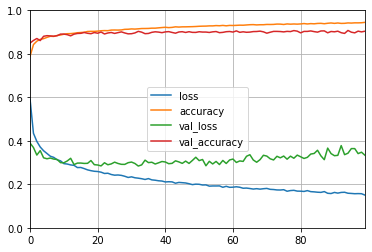

In [51]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [55]:
y_test_one_hot = one_hot.transform(y_test.reshape(-1,1)).toarray()
model.evaluate(X_test, y_test_one_hot)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.40209058698415756, 0.8968]

In [56]:
y_pred = model.predict(X_test)

In [59]:
import numpy as np
y_pred_argmax = np.argmax(y_pred, axis=1)

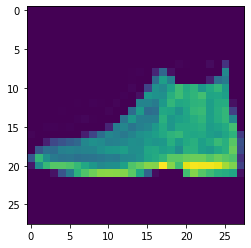

In [62]:
plt.imshow(X_test[0])

In [64]:
class_names[y_pred_argmax[0]]

'Ankle boot'

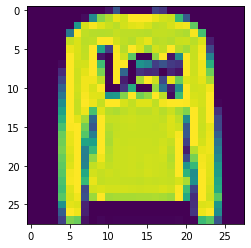

In [65]:
plt.imshow(X_test[1])

In [66]:
class_names[y_pred_argmax[1]]

'Pullover'

In [70]:
from sklearn.metrics import confusion_matrix
confusion_df = pd.DataFrame(confusion_matrix(y_pred=y_pred_argmax, y_true=y_test))

In [71]:
confusion_df.columns = class_names.copy()

In [72]:
confusion_df.index = class_names.copy()

In [73]:
confusion_df

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,879,3,12,22,4,1,76,0,3,0
Trouser,2,986,1,7,2,0,1,0,1,0
Pullover,20,2,823,9,84,0,61,0,1,0
Dress,16,10,8,897,45,0,21,0,3,0
Coat,0,1,88,25,830,0,54,0,2,0
Sandal,0,0,0,0,0,960,0,16,0,24
Shirt,127,2,80,27,63,0,700,0,1,0
Sneaker,0,0,0,0,0,10,0,968,0,22
Bag,6,0,1,4,6,2,6,3,972,0
Ankle boot,0,0,0,0,0,3,1,43,0,953


# California housing


In [74]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [75]:
housing_data = fetch_california_housing()

In [78]:
X_train, X_test, y_train, y_test = train_test_split(housing_data.data, housing_data.target)

In [79]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
X_train

array([[-1.29263367,  1.05434283, -0.90015823, ...,  0.08832041,
        -0.7575143 ,  0.71552313],
       [-0.09910243,  0.33864603,  0.4139054 , ..., -0.0192291 ,
         1.40733205, -0.905812  ],
       [ 0.79540359, -0.45657264, -0.1622956 , ...,  0.0398606 ,
         0.8450343 , -1.15025945],
       ...,
       [-1.24223675,  0.73625536, -0.6443598 , ..., -0.04678679,
         1.08401084, -1.38971818],
       [-0.24525874,  1.8495615 , -0.30838977, ...,  0.10167195,
        -0.88871711,  0.85021867],
       [-1.24800539, -0.69513824, -0.69469441, ..., -0.08272983,
        -1.35261275,  1.24432782]])

In [85]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(.2),
    keras.layers.Dense(1)
])

In [87]:
model.compile(loss="mean_squared_error", optimizer='adam')
history = model.fit(X_train, y_train, epochs=100,
                   validation_split=.2)

Train on 12384 samples, validate on 3096 samples
Epoch 1/100
12384/12384 [==============================] - 1s 63us/sample - loss: 1.7514 - val_loss: 1.9413
Epoch 2/100
12384/12384 [==============================] - 0s 34us/sample - loss: 0.9409 - val_loss: 1.1943
Epoch 3/100
12384/12384 [==============================] - 0s 34us/sample - loss: 0.7622 - val_loss: 0.7457
Epoch 4/100
12384/12384 [==============================] - 0s 33us/sample - loss: 0.6426 - val_loss: 0.6372
Epoch 5/100
12384/12384 [==============================] - 0s 34us/sample - loss: 0.5964 - val_loss: 0.4918
Epoch 6/100
12384/12384 [==============================] - 0s 34us/sample - loss: 0.5706 - val_loss: 0.4528
Epoch 7/100
12384/12384 [==============================] - 0s 35us/sample - loss: 0.5421 - val_loss: 0.4163
Epoch 8/100
12384/12384 [==============================] - 0s 34us/sample - loss: 0.5066 - val_loss: 0.3981
Epoch 9/100
12384/12384 [==============================] - 0s 33us/sample - loss: 0.506

In [88]:
mse_test = model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [89]:
X_new = X_test[:3]

In [90]:
y_pred = model.predict(X_new)

In [91]:
y_pred

array([[2.9834476],
       [1.6198893],
       [3.299181 ]], dtype=float32)

In [92]:
y_test[:3]

array([3.993, 1.35 , 4.421])

In [95]:
# california wide_deep_neural_network
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
dropout1 = keras.layers.Dropout(0.2)(hidden1)
hidden2 = keras.layers.Dense(30, activation='relu')(dropout1)
dropout2 = keras.layers.Dropout(0.2)(hidden2)
concat = keras.layers.Concatenate()([input_, dropout2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

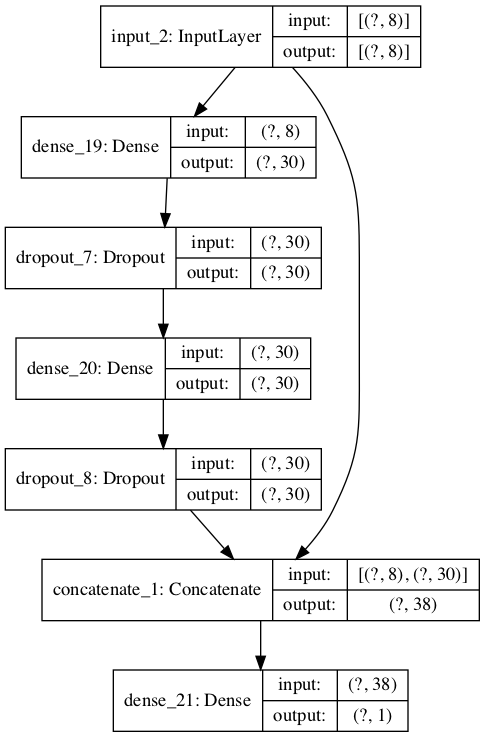

In [96]:
keras.utils.plot_model(model, show_shapes=True)

In [97]:
model.compile(loss="mean_squared_error", optimizer='adam')
history = model.fit(X_train, y_train, epochs=100,
                   validation_split=.2)

Train on 12384 samples, validate on 3096 samples
Epoch 1/100
12384/12384 [==============================] - 1s 66us/sample - loss: 1.4011 - val_loss: 0.7050
Epoch 2/100
12384/12384 [==============================] - 0s 35us/sample - loss: 0.7061 - val_loss: 0.5525
Epoch 3/100
12384/12384 [==============================] - 0s 38us/sample - loss: 0.6076 - val_loss: 0.5206
Epoch 4/100
12384/12384 [==============================] - 0s 38us/sample - loss: 0.5564 - val_loss: 0.4777
Epoch 5/100
12384/12384 [==============================] - 0s 37us/sample - loss: 0.5260 - val_loss: 0.4351
Epoch 6/100
12384/12384 [==============================] - 0s 38us/sample - loss: 0.5007 - val_loss: 0.4661
Epoch 7/100
12384/12384 [==============================] - 0s 38us/sample - loss: 0.4908 - val_loss: 0.4081
Epoch 8/100
12384/12384 [==============================] - 0s 37us/sample - loss: 0.4650 - val_loss: 0.3961
Epoch 9/100
12384/12384 [==============================] - 0s 36us/sample - loss: 0.450

In [98]:
mse_test = model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [101]:
# input2 model
input_A = keras.layers.Input(shape=[5], name = 'wide_input')
input_B = keras.layers.Input(shape=[6], name = 'deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

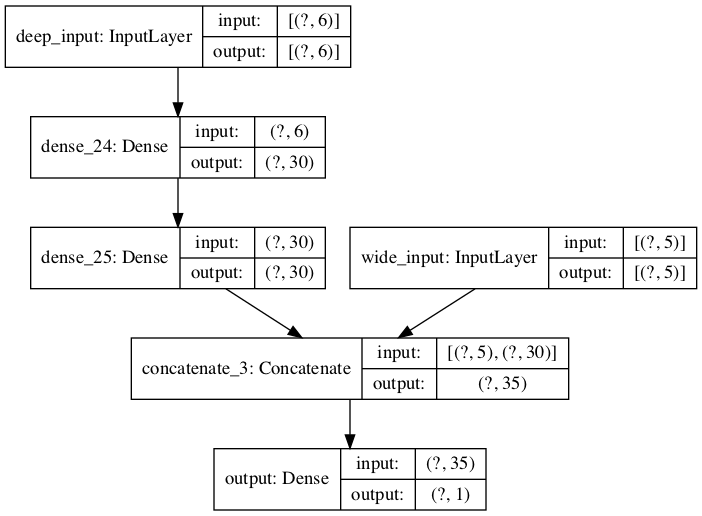

In [102]:
keras.utils.plot_model(model, show_shapes=True)

In [104]:
model.compile(loss="mean_squared_error", optimizer='adam')
history = model.fit((X_train[:,:5], X_train[:, 2:]), y_train, epochs=30,
                   validation_split=.2)

Train on 12384 samples, validate on 3096 samples
Epoch 1/30
12384/12384 [==============================] - 1s 61us/sample - loss: 1.2609 - val_loss: 0.5883
Epoch 2/30
12384/12384 [==============================] - 0s 37us/sample - loss: 0.4564 - val_loss: 0.4819
Epoch 3/30
12384/12384 [==============================] - 0s 37us/sample - loss: 0.4048 - val_loss: 0.4205
Epoch 4/30
12384/12384 [==============================] - 0s 37us/sample - loss: 0.3790 - val_loss: 0.4419
Epoch 5/30
12384/12384 [==============================] - 0s 39us/sample - loss: 0.3597 - val_loss: 0.3830
Epoch 6/30
12384/12384 [==============================] - 0s 37us/sample - loss: 0.3505 - val_loss: 0.3571
Epoch 7/30
12384/12384 [==============================] - 0s 36us/sample - loss: 0.3417 - val_loss: 0.4560
Epoch 8/30
12384/12384 [==============================] - 0s 37us/sample - loss: 0.3384 - val_loss: 0.3684
Epoch 9/30
12384/12384 [==============================] - 0s 37us/sample - loss: 0.3322 - val_l

In [106]:
mse_test = model.evaluate((X_test[:,:5],X_test[:,2:]), y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [107]:
# input2 model
input_A = keras.layers.Input(shape=[5], name = 'wide_input')
input_B = keras.layers.Input(shape=[6], name = 'deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output,aux_output])

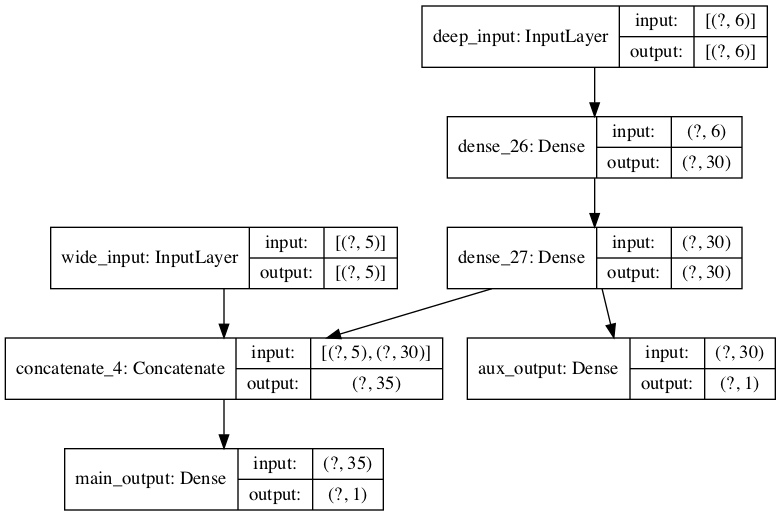

In [108]:
keras.utils.plot_model(model, show_shapes=True)

In [109]:
model.compile(loss=['mse','mse'], loss_weights=[.9, .1], optimizer='adam')

In [110]:
history = model.fit(
    (X_train[:,:5], X_train[:, 2:]), (y_train, y_train), epochs=30,
    validation_split=.1
)

Train on 13932 samples, validate on 1548 samples
Epoch 1/30
13932/13932 [==============================] - 1s 83us/sample - loss: 1.3745 - main_output_loss: 1.2881 - aux_output_loss: 2.1406 - val_loss: 0.6994 - val_main_output_loss: 0.6471 - val_aux_output_loss: 1.1646
Epoch 2/30
13932/13932 [==============================] - 1s 42us/sample - loss: 0.5250 - main_output_loss: 0.4900 - aux_output_loss: 0.8412 - val_loss: 0.5407 - val_main_output_loss: 0.5216 - val_aux_output_loss: 0.7113
Epoch 3/30
13932/13932 [==============================] - 1s 41us/sample - loss: 0.4446 - main_output_loss: 0.4257 - aux_output_loss: 0.6132 - val_loss: 0.4664 - val_main_output_loss: 0.4484 - val_aux_output_loss: 0.6253
Epoch 4/30
13932/13932 [==============================] - 1s 41us/sample - loss: 0.4240 - main_output_loss: 0.4084 - aux_output_loss: 0.5626 - val_loss: 0.4719 - val_main_output_loss: 0.4601 - val_aux_output_loss: 0.5702
Epoch 5/30
13932/13932 [==============================] - 1s 41us/s

# MNIST

In [114]:
mnist_data = keras.datasets.mnist

In [115]:
(X_train_full, y_train_full), (X_test, y_test) = mnist_data.load_data()

In [116]:
X_train_full.shape

(60000, 28, 28)

In [117]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(625, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
    
])

In [119]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [120]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('mnist_model.h5')
earlystop_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_cb = keras.callbacks.TensorBoard('./my_logs/MNIST_20200730')
history = model.fit(X_train_full, y_train_full, epochs=1000, validation_split=.1, callbacks=[checkpoint_cb, earlystop_cb, tensorboard_cb])


Train on 54000 samples, validate on 6000 samples
Epoch 1/1000
54000/54000 [==============================] - 15s 270us/sample - loss: 2.3251 - accuracy: 0.3297 - val_loss: 0.6748 - val_accuracy: 0.7658
Epoch 2/1000
54000/54000 [==============================] - 14s 258us/sample - loss: 0.8236 - accuracy: 0.7408 - val_loss: 0.3597 - val_accuracy: 0.9163
Epoch 3/1000
54000/54000 [==============================] - 14s 259us/sample - loss: 0.5599 - accuracy: 0.8538 - val_loss: 0.1964 - val_accuracy: 0.9545
Epoch 4/1000
54000/54000 [==============================] - 14s 260us/sample - loss: 0.4317 - accuracy: 0.8991 - val_loss: 0.2167 - val_accuracy: 0.9548
Epoch 5/1000
54000/54000 [==============================] - 14s 263us/sample - loss: 0.3711 - accuracy: 0.9163 - val_loss: 0.1752 - val_accuracy: 0.9593
Epoch 6/1000
54000/54000 [==============================] - 14s 264us/sample - loss: 0.3306 - accuracy: 0.9248 - val_loss: 0.1441 - val_accuracy: 0.9673
Epoch 7/1000
54000/54000 [=======

In [121]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.14192360197686357, 0.9717]